In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concrete-compressive-strength-data-set/concrete_data.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("../input/concrete-compressive-strength-data-set/concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

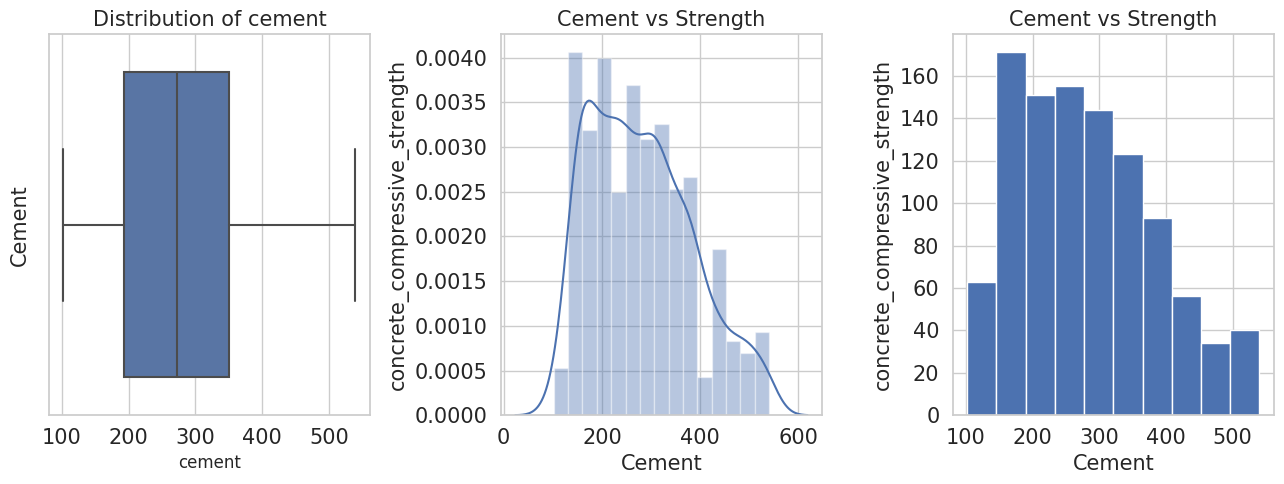

In [5]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('concrete_compressive_strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('concrete_compressive_strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [6]:
df2=df.drop(columns=["concrete_compressive_strength"])

In [7]:
df_columns=df2.keys()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler  #standarize the dataset to make it more useable.
scaler =  Pipeline([('Normalizer', Normalizer()), 
#                    ('log-transformation', math.logp())
                   ])
df2=scaler.fit_transform(df2);
df2=np.array(df2);df2

array([[0.39624448, 0.        , 0.        , ..., 0.76313751, 0.49603938,
        0.02054601],
       [0.39293409, 0.        , 0.        , ..., 0.7676768 , 0.49189527,
        0.02037436],
       [0.27357162, 0.11724498, 0.        , ..., 0.76682331, 0.48872645,
        0.22214838],
       ...,
       [0.12141129, 0.11397127, 0.08878967, ..., 0.72961238, 0.63771588,
        0.02289237],
       [0.1222549 , 0.14346317, 0.        , ..., 0.76042395, 0.60620297,
        0.02151563],
       [0.21646863, 0.08338481, 0.06496548, ..., 0.71727531, 0.63181625,
        0.02323159]])

In [8]:
df1=pd.DataFrame(df2,columns=df_columns)
df1["concrete_compressive_strength"]=df["concrete_compressive_strength"]
df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,0.396244,0.000000,0.000000,0.118873,0.001834,0.763138,0.496039,0.020546,79.99
1,0.392934,0.000000,0.000000,0.117880,0.001819,0.767677,0.491895,0.020374,61.89
2,0.273572,0.117245,0.000000,0.187592,0.000000,0.766823,0.488726,0.222148,40.27
3,0.268151,0.114922,0.000000,0.183875,0.000000,0.751630,0.479043,0.294361,41.05
4,0.145536,0.097024,0.000000,0.140700,0.000000,0.716983,0.604936,0.263812,44.30
...,...,...,...,...,...,...,...,...,...
1025,0.227316,0.095400,0.074264,0.147706,0.007320,0.715584,0.631862,0.023028,44.28
1026,0.264217,0.000000,0.094797,0.160728,0.008528,0.670711,0.667021,0.022961,31.18
1027,0.121411,0.113971,0.088790,0.157549,0.004987,0.729612,0.637716,0.022892,23.70
1028,0.122255,0.143463,0.000000,0.134934,0.008683,0.760424,0.606203,0.021516,32.77


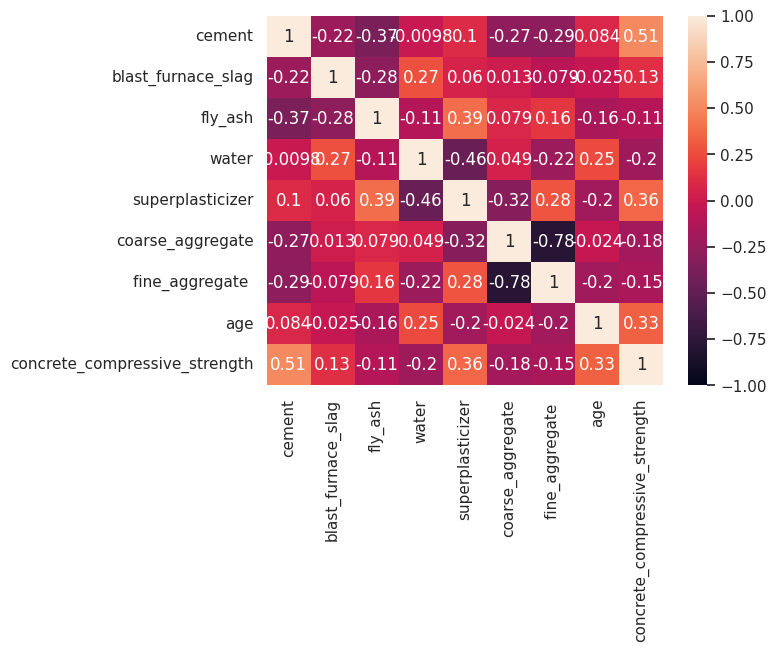

In [9]:
corr = df1.corr()
sns.heatmap(corr,annot=True,vmax=1,vmin=-1)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
X = df1.drop(columns=["concrete_compressive_strength"])
y = df1.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

In [11]:
!pip install statsmodels

In [12]:
!pip install lightgbm
!pip install xgboost

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.linear_model import LogisticRegression

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2),round(mean_squared_error(y_test,yhat),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor(),DecisionTreeRegressor(),LinearRegression(),
     KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(ExtraTreeRegressor(), random_state=42),
     GaussianProcessRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE','MSE'])

,Model,Score,MAE,RMSE,MSE
0,GradientBoostingRegressor,0.873,4.27,5.87,34.48
1,LGBMRegressor,0.892,3.36,5.41,29.31
2,XGBRFRegressor,0.819,5.16,7.01,49.10
3,DecisionTreeRegressor,0.800,4.93,7.37,54.30
4,LinearRegression,0.671,7.33,9.43,89.00
5,KNeighborsRegressor,0.719,6.79,8.73,76.19
6,RandomForestRegressor,0.881,3.96,5.67,32.15
7,BaggingRegressor,0.873,4.05,5.88,34.53
8,GaussianProcessRegressor,0.834,4.60,6.71,44.99


In [14]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=42)
regr = LGBMRegressor(n_estimators=1000, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8,learning_rate=.1,reg_lambda=0.2)
#best_model
regr.fit(X_train, y_train)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


LGBMRegressor(colsample_bytree=0.8, eta=0.1, max_depth=20, n_estimators=1000,
              reg_lambda=0.2, subsample=0.7)

In [15]:
y_pred=regr.predict(X_test);y_pred

array([53.34887734, 39.43235961, 76.37623394, 35.27790472, 10.99048232,
       45.27745286, 24.79265707, 51.81585737, 32.75211926, 44.89312136,
       38.40100177, 11.84360681, 40.73126859, 47.96752783, 23.58800849,
       24.14710816, 39.81008396, 19.20612159, 37.24810503, 34.37521431,
       33.80203041, 40.33618849, 48.37968407,  8.19155006, 32.37477662,
       38.31847098,  6.96309848, 43.21795604, 53.55513589, 14.6349889 ,
       53.78758926, 36.83965525, 49.30032844, 58.22367907, 18.01393026,
       35.30628124, 32.9044962 , 42.30925184, 13.06335044, 50.00087171,
       13.3056119 ,  6.05802639, 34.89371098, 44.42642803, 13.70856279,
       65.61508908, 46.89197321, 38.7354274 , 23.55130392,  4.56679376,
       56.61647869, 42.57972486, 26.92650438, 15.04789703, 42.00110053,
       31.73935071, 28.24267965, 12.32611317, 30.48152044, 20.52659355,
       42.02821129, 13.51199799, 39.15808622, 50.63626215, 32.3606777 ,
       16.82199326, 34.71575411, 13.20848023, 32.49251564, 24.02

In [16]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r2_score",round(r2_score(y_test, y_pred), 4)*100)

MAE: 3.1013174326657187
MSE: 23.312466209060776
RMSE: 4.8282984796987
r2_score 91.39


In [17]:
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(X)

dnn = keras.models.Sequential([
    normalizer,
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
dnn.compile(loss='mean_absolute_error', optimizer=keras.optimizers.Adam(0.001))
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4818 (18.82 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


In [18]:
dnn.fit(X_train,y_train,epochs=100,batch_size=1,validation_data=(X_test,y_test))

Epoch 1/100
772/772 [==============================] - 2s 2ms/step - loss: 15.7072 - val_loss: 10.4688
Epoch 2/100
772/772 [==============================] - 1s 1ms/step - loss: 10.2634 - val_loss: 9.3378
Epoch 3/100
772/772 [==============================] - 1s 2ms/step - loss: 9.2592 - val_loss: 8.8456
Epoch 4/100
772/772 [==============================] - 1s 1ms/step - loss: 8.4710 - val_loss: 7.5966
Epoch 5/100
772/772 [==============================] - 1s 2ms/step - loss: 7.5526 - val_loss: 6.7016
Epoch 6/100
772/772 [==============================] - 1s 2ms/step - loss: 6.4859 - val_loss: 6.3095
Epoch 7/100
772/772 [==============================] - 1s 2ms/step - loss: 5.8922 - val_loss: 6.5044
Epoch 8/100
772/772 [==============================] - 1s 2ms/step - loss: 5.2968 - val_loss: 5.6377
Epoch 9/100
772/772 [==============================] - 1s 2ms/step - loss: 5.1484 - val_loss: 5.1183
Epoch 10/100
772/772 [==============================] - 1s 2ms/step - loss: 4.9579 - val